In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [72]:
D_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Daily_Weather.csv")
D_data.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [73]:
##weekday column
# Convert the 'Date' column to datetime format
D_data['Date'] = pd.to_datetime(D_data['Date'])

# Create the 'Weekday' column by applying the .weekday() method
D_data['WeekdayNum'] = D_data['Date'].dt.weekday

D_data['Year'] = D_data['Date'].dt.year

def get_season (date):
    month = date.month
    if month in [12,1,2]:
        return 1
    elif month in [3,4,5]:
        return 2
    elif month in [6,7,8]:
        return 3
    elif month in [9,10,11]: 
        return 4
    
D_data['Season'] = D_data['Date'].apply(get_season)

import holidays
us_holidays = holidays.US()
D_data['Holiday'] = D_data['Date'].apply(lambda value: value in us_holidays)

D_data['Season_year'] = D_data['Season'].astype(str) + "-" + D_data['Year'].astype(str)
    
D_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   WeekdayNum                      1095 non-null   int32         
 9   Year                            1095 non-null   int32         
 10  Season                          1095 non-null   int64         
 11  Holi

In [74]:
D_data.head()


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),WeekdayNum,Year,Season,Holiday,Season_year
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,4,2021,1,True,1-2021
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,5,2021,1,False,1-2021
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,6,2021,1,False,1-2021
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,0,2021,1,False,1-2021
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,1,False,1-2021


In [ ]:
D_data = D_data.drop(columns=['temperature_2m_mean (°C)','Total_rides','Year'],axis=1)

In [76]:
D_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   apparent_temperature_mean (°C)  1095 non-null   float64       
 4   weathercode (wmo code)          1095 non-null   int64         
 5   windspeed_10m_max (km/h)        1095 non-null   float64       
 6   WeekdayNum                      1095 non-null   int32         
 7   Year                            1095 non-null   int32         
 8   Season                          1095 non-null   int64         
 9   Holiday                         1095 non-null   bool          
 10  Season_year                     1095 non-null   object        
dtypes: b

<Axes: >

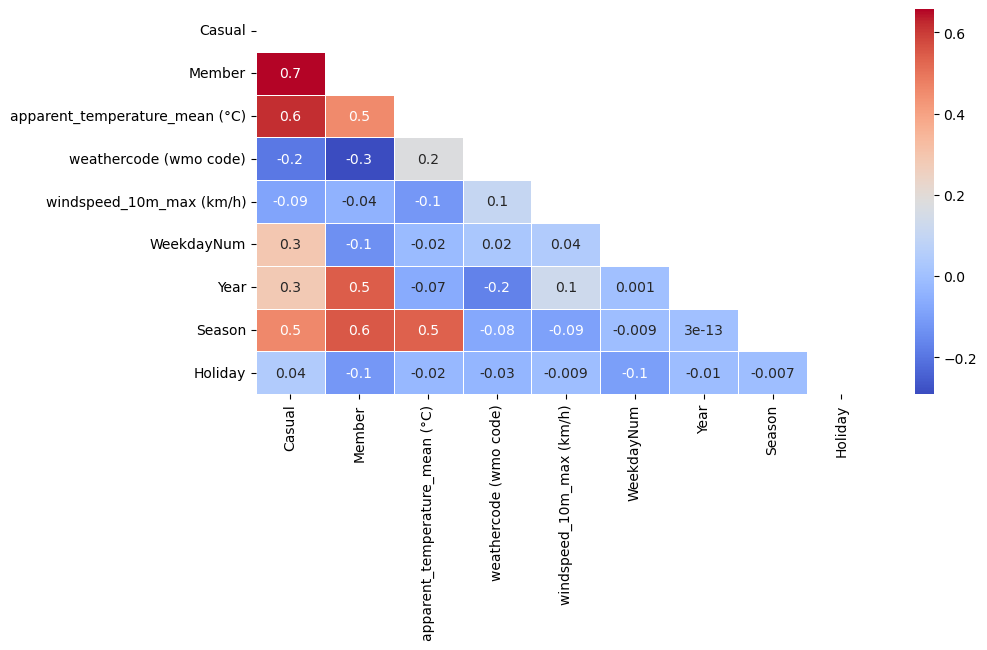

In [77]:
plt.figure(figsize=(10,5), dpi=100)
D_matrix = np.triu(D_data.corr(numeric_only=True))
sns.heatmap(D_data.corr(numeric_only=True), mask= D_matrix, cmap='coolwarm',fmt='.1g', annot=True, linewidths=0.5)

In [ ]:
D_data = pd.get_dummies(D_data)

In [ ]:
D_data.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),WeekdayNum,Year,...,Season_year_1-2023,Season_year_2-2021,Season_year_2-2022,Season_year_2-2023,Season_year_3-2021,Season_year_3-2022,Season_year_3-2023,Season_year_4-2021,Season_year_4-2022,Season_year_4-2023
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,4,2021,...,False,False,False,False,False,False,False,False,False,False
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,5,2021,...,False,False,False,False,False,False,False,False,False,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,6,2021,...,False,False,False,False,False,False,False,False,False,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,0,2021,...,False,False,False,False,False,False,False,False,False,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,1,2021,...,False,False,False,False,False,False,False,False,False,False
